## UNEMPLOYMENT ANALYSIS WITH PYTHON

Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project.

In [1]:
## importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading the dataset
df = pd.read_csv('Unemployment in India.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [5]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [7]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [8]:
## checking for the null values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [9]:
## dropping the null values
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [11]:
## checking for duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
749    False
750    False
751    False
752    False
753    False
Length: 740, dtype: bool

In [12]:
df[df.duplicated()]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area


In [13]:
df.duplicated().sum()

0

In [14]:
## deleting the duplicates
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

In [16]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [17]:
df['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [18]:
## changing the names of the columns
df.columns =['state','date','frequency','est unemployment rate','est employed','est labour participation rate','area']

In [19]:
df.tail()

,state,date,frequency,est unemployment rate,est employed,est labour participation rate,area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [20]:
df['date']

0       31-05-2019
1       30-06-2019
2       31-07-2019
3       31-08-2019
4       30-09-2019
          ...     
749     29-02-2020
750     31-03-2020
751     30-04-2020
752     31-05-2020
753     30-06-2020
Name: date, Length: 740, dtype: object

In [21]:
## adding a new year column
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [22]:
df.head()

,state,date,frequency,est unemployment rate,est employed,est labour participation rate,area,year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019


In [23]:
df['year'].value_counts()

2019    430
2020    310
Name: year, dtype: int64

### Coorelations Matrix

In [24]:
df.corr()

C:\Users\aatwi\AppData\Local\Temp\ipykernel_40240\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,est unemployment rate,est employed,est labour participation rate,year
est unemployment rate,1.000000,-0.222876,0.002558,0.262602
est employed,-0.222876,1.000000,0.011300,-0.031841
est labour participation rate,0.002558,0.011300,1.000000,-0.182460
year,0.262602,-0.031841,-0.182460,1.000000


C:\Users\aatwi\AppData\Local\Temp\ipykernel_40240\305688821.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

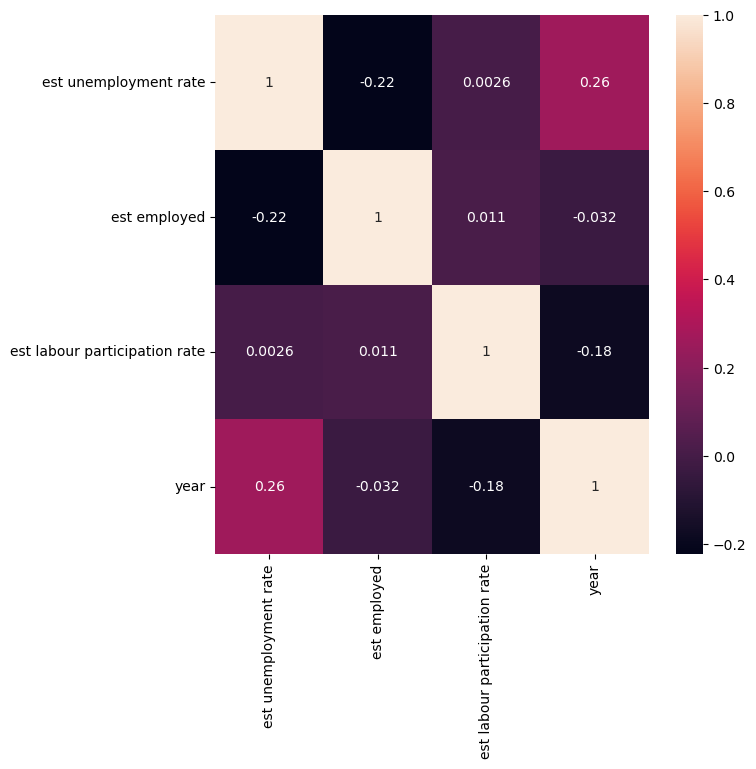

In [25]:
corr=df.corr()
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr,annot=True, ax=ax)

C:\Users\aatwi\AppData\Local\Temp\ipykernel_40240\1311360881.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

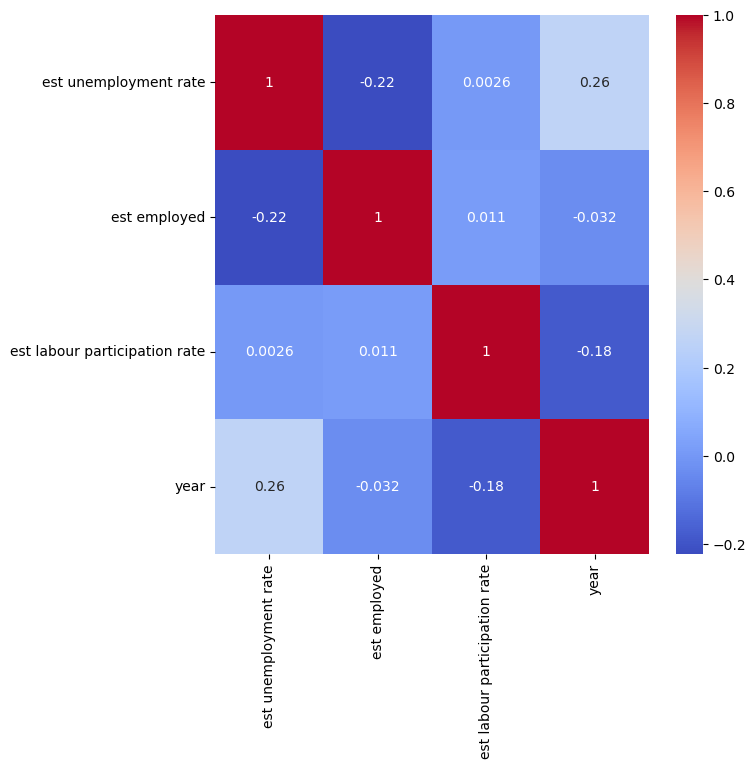

In [26]:
## heatmap with high intensity to figure out the values.
corr=df.corr()
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr,annot=True, ax=ax, cmap='coolwarm')

### EXPLORATORY DATA ANALYSIS

In [27]:
df.head()

,state,date,frequency,est unemployment rate,est employed,est labour participation rate,area,year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019


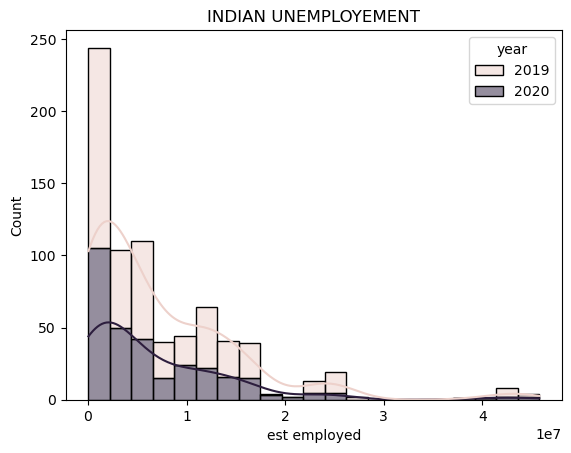

In [28]:
## PLOTING A HISTOGRAM ON EMPLOYEMENT BY STATES
plt.title('INDIAN UNEMPLOYEMENT')
sns.histplot(x='est employed', hue='year', data=df, kde=True, multiple='stack')
plt.show()

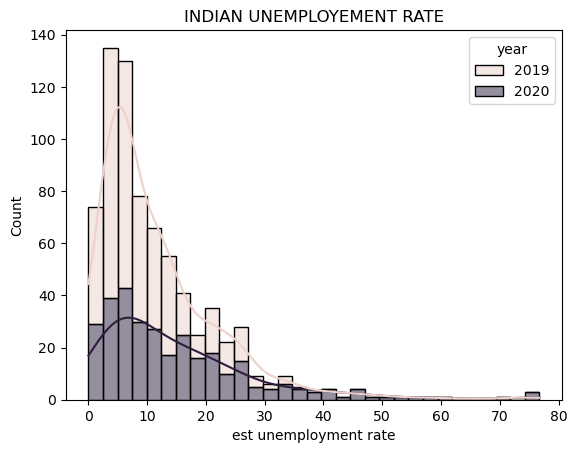

In [29]:
plt.title('INDIAN UNEMPLOYEMENT RATE')
sns.histplot(x= 'est unemployment rate', hue='year', data=df, kde=True, multiple='stack')
plt.show()

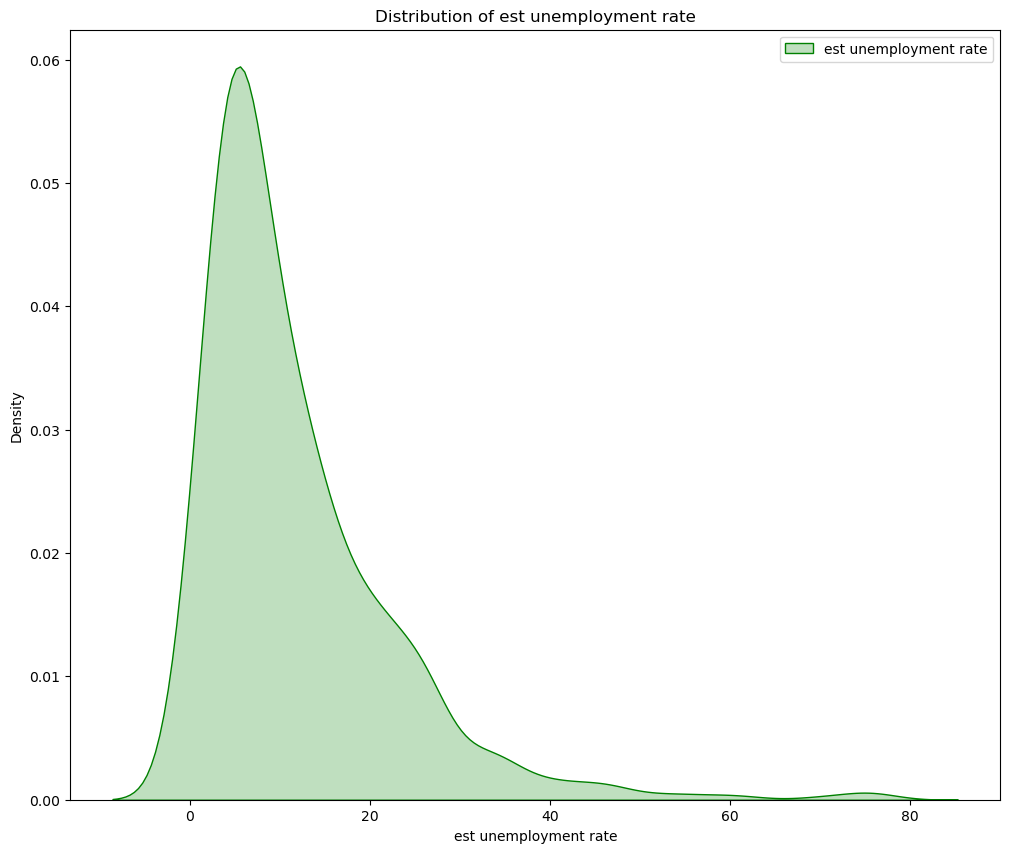

In [30]:
plt.figure(figsize=(12,10))
sns.kdeplot(df['est unemployment rate'], color  = 'green' , fill = True  )
plt.legend(['est unemployment rate'])
plt.title('Distribution of est unemployment rate')
plt.show()


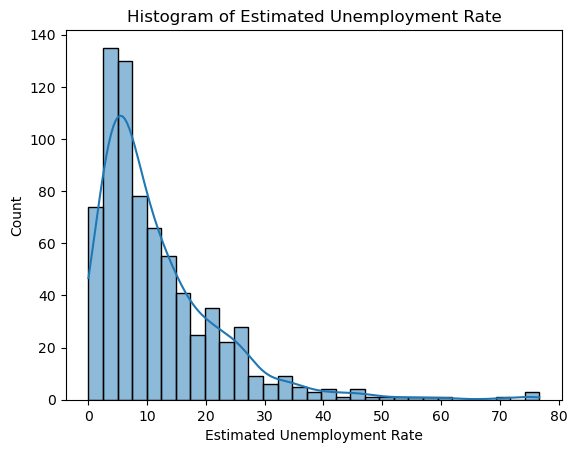

In [31]:
sns.histplot(df['est unemployment rate'], kde=True)
plt.xlabel('Estimated Unemployment Rate')
plt.title('Histogram of Estimated Unemployment Rate')
plt.show()

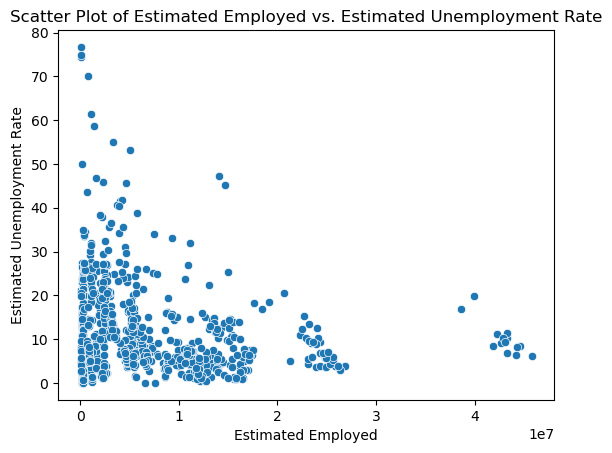

In [32]:
sns.scatterplot(x='est employed', y='est unemployment rate', data=df)
plt.xlabel('Estimated Employed')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Scatter Plot of Estimated Employed vs. Estimated Unemployment Rate')
plt.show()

Unemployment rate is high when the estimated number of employed candidates are less.

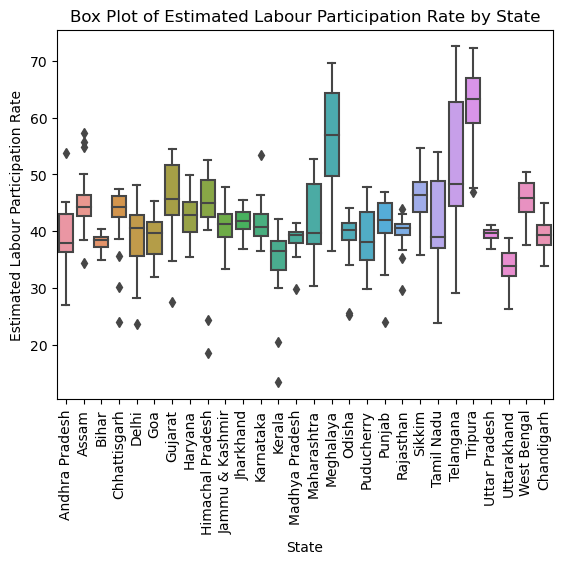

In [33]:
sns.boxplot(x='state', y='est labour participation rate', data=df)
plt.xlabel('State')
plt.ylabel('Estimated Labour Participation Rate')
plt.title('Box Plot of Estimated Labour Participation Rate by State')
plt.xticks(rotation=90)
plt.show()